In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read in data

In [2]:
df = pd.read_csv("train.csv", parse_dates=True, index_col=0)
Xtest2 = pd.read_csv("test.csv", parse_dates=True, index_col=0)

datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter  
holiday - whether the day is considered a holiday  
workingday - whether the day is neither a weekend nor holiday  
weather -  
1: Clear, Few clouds, Partly cloudy, Partly cloudy  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
temp - temperature in Celsius  
atemp - "feels like" temperature in Celsius  
humidity - relative humidity  
windspeed - wind speed  
casual - number of non-registered user rentals initiated  
registered - number of registered user rentals initiated  
count - number of total rentals  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [4]:
df.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# Basic EDA

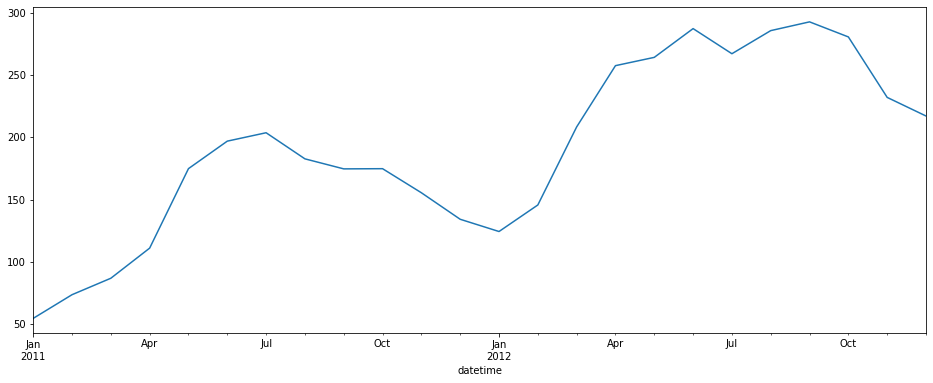

In [5]:
resampled = df.resample("M").mean()
resampled["count"].plot(figsize=(16, 6))

In [6]:
# last days of every month missing
df.index.day[400:500]

Int64Index([18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19,
            19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,  1,  1,  1,
             1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
             1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
             2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,
             3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
           dtype='int64', name='datetime')

In [7]:
# shape of data
# sns.pairplot(df)

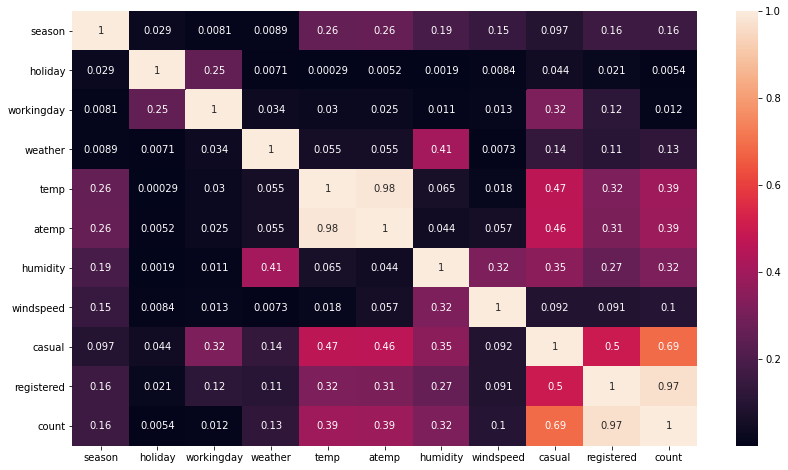

In [8]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr().abs(), annot=True)

(              count
 datetime           
 0         55.138462
 1         33.859031
 2         22.899554
 3         11.757506
 4          6.407240,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcd9d5a6c10>)

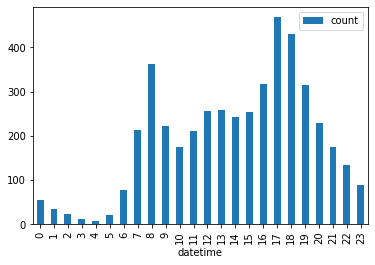

In [9]:
hour = df[["count"]].groupby(df.index.hour).mean()
hour.head(), hour.plot.bar()

(               count
 datetime            
 1         180.333913
 2         183.910995
 3         194.696335
 4         195.705575
 5         189.765217,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcd9d5e57f0>)

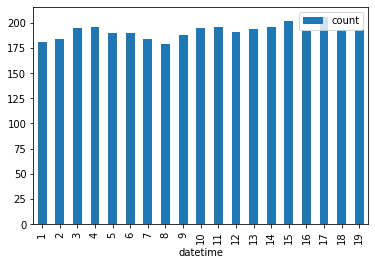

In [10]:
day = df[["count"]].groupby(df.index.day).mean()
day.head(), day.plot.bar()

(               count
 datetime            
 1          95.072948
 2          88.760606
 3          98.922078
 5         103.609195
 6         101.551515,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcd9c23dfd0>)

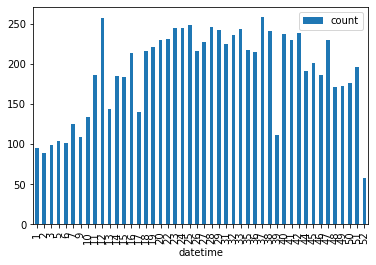

In [11]:
week = df[["count"]].groupby(df.index.week).mean()
week.head(), week.plot.bar()

(               count
 datetime            
 1          90.366516
 2         110.003330
 3         148.169811
 4         184.160616
 5         219.459430,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcd9c15a5b0>)

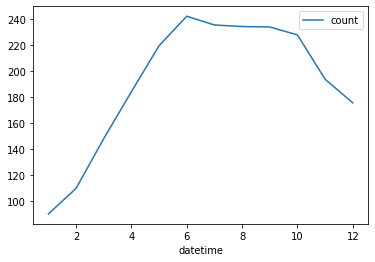

In [12]:
month = df[["count"]].groupby(df.index.month).mean()
month.head(), month.plot()

(               count
 datetime            
 2011      144.223349
 2012      238.560944,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcd9c0bbd60>)

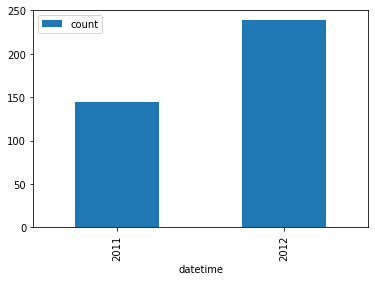

In [13]:
year = df[["count"]].groupby(df.index.year).mean()
year.head(), year.plot.bar()

(                   count
 temp                    
 (28.0, 41.0]  308.246542
 (23.0, 28.0]  224.393324
 (17.0, 23.0]  186.304057
 (13.0, 17.0]  164.068218
 (0.0, 13.0]    96.322324,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcd9c0848b0>)

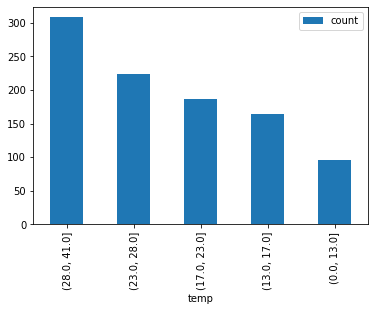

In [14]:
temp = (
    df[["count"]]
    .groupby(pd.qcut(df["temp"], q=5, precision=0))
    .mean()
    .sort_values(by="count", ascending=False)
)
temp, temp.plot.bar()

(                    count
 humidity                 
 (-1.0, 44.0]   276.324054
 (44.0, 56.0]   214.597333
 (56.0, 68.0]   197.880906
 (68.0, 81.0]   152.165825
 (81.0, 100.0]  109.964286,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcd9c0757f0>)

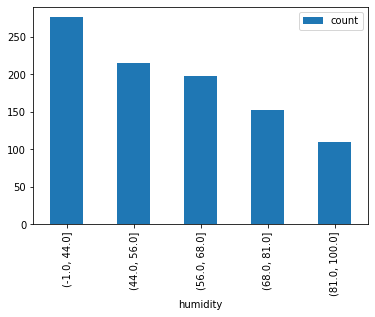

In [15]:
humidity = (
    df[["count"]]
    .groupby(pd.qcut(df["humidity"], q=5, precision=0))
    .mean()
    .sort_values(by="count", ascending=False)
)
humidity, humidity.plot.bar()

(                   count
 windspeed               
 (15.0, 19.0]  216.291333
 (19.0, 57.0]  211.916960
 (11.0, 15.0]  206.367948
 (6.0, 11.0]   182.541576
 (-1.0, 6.0]   155.818764,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcd9dc0bf70>)

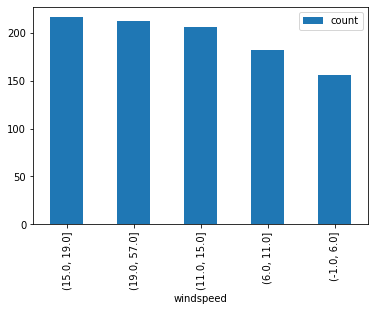

In [16]:
windspeed = (
    df[["count"]]
    .groupby(pd.qcut(df["windspeed"], q=5, precision=0))
    .mean()
    .sort_values(by="count", ascending=False)
)
windspeed, windspeed.plot.bar()

# Train test split

In [17]:
X = df.drop("count", axis=1)
y = df["count"]

In [18]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

# Feature Engineering

Extraction from DatetimeIndex

In [19]:
def datetime_extract(df, feature):
    if feature == "hour":
        extract = df.index.hour
    elif feature == "day":
        extract = df.index.day
    elif feature == "week":
        extract = df.index.week
    elif feature == "month":
        extract = df.index.month
    elif feature == "year":
        extract = df.index.year
    return extract

In [20]:
def qcutting(df, col, q=5, labels=[0, 1, 2, 3, 4]):
    slices = pd.qcut(df[col], q=q, precision=0, labels=labels)
    bins = pd.get_dummies(slices)
    return pd.concat([df, bins], axis=1)

### Final Featurization

Pick features

In [21]:
# one hot
datetime_features = ["hour", "day", "week", "month", "year"]
# binning
qcut_features = ["temp", "humidity", "windspeed"]
qcut_labels = [
    ["temp_0-13", "temp_13-17", "temp_17-23", "temp_23-28", "temp_28-41"],
    ["hum_0-44", "hum_44-56", "hum_56-68", "hum_68-81", "hum_81-100"],
    ["wind_0-6", "wind_6-11", "wind_11-15", "wind_15-19", "wind_19-57"],
]

In [22]:
def feature_engineering(df):
    for feat in datetime_features:
        df[feat] = datetime_extract(df, feat)
    for i, feat in enumerate(qcut_features):
        df = qcutting(df, feat, labels=qcut_labels[i])
    return df


Xtrain = feature_engineering(Xtrain)
Xtest = feature_engineering(Xtest)
Xtest2 = feature_engineering(Xtest2)

<ipython-input-22-77ce53ab21e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat] = datetime_extract(df, feat)


In [23]:
Xtest

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,hum_0-44,hum_44-56,hum_56-68,hum_68-81,hum_81-100,wind_0-6,wind_6-11,wind_11-15,wind_15-19,wind_19-57
datetime,,,,,,,,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,...,0,0,0,1,0,0,0,1,0,0
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,...,0,0,0,0,1,0,0,1,0,0
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,...,0,1,0,0,0,0,0,1,0,0
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,...,1,0,0,0,0,0,0,0,0,1
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-06 10:00:00,4,0,1,3,18.86,22.725,94,19.0012,6,44,...,0,0,0,0,1,0,0,0,1,0
2012-04-10 07:00:00,2,0,1,1,13.94,17.425,71,7.0015,16,368,...,0,0,0,1,0,0,1,0,0,0
2012-04-02 05:00:00,2,0,1,1,16.40,20.455,76,32.9975,2,22,...,0,0,0,1,0,0,0,0,0,1


### Prepare data

In [24]:
features = [
    "season",
    "weather",
    "hour",
    "day",
    "week",
    "month",
    "year",
    "holiday",
    "workingday",
    "hum_0-44",
    "hum_44-56",
    "hum_56-68",
    "hum_68-81",
    "hum_81-100",
    "temp_0-13",
    "temp_13-17",
    "temp_17-23",
    "temp_23-28",
    "temp_28-41",
    "wind_0-6",
    "wind_6-11",
    "wind_11-15",
    "wind_15-19",
    "wind_19-57",
]

In [34]:
Xtrain = Xtrain[features]
Xtest = Xtest[features]
Xtest2 = Xtest2[features]

# Linear Regression Model

In [35]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(Xtrain, ytrain)
test_predict = lr.predict(Xtest)

In [36]:
print("train score :", lr.score(Xtrain, ytrain))
print("test score  :", lr.score(Xtest, ytest))

train score : 0.3898319650880445
test score  : 0.3912749132565637


# Random Forest Regressor

In [37]:
# Loss function: root mean squared log error (for kaggle submission)
from sklearn.metrics import make_scorer, mean_squared_log_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(Xtrain, ytrain)
test_predict = rfr.predict(Xtest)
kaggle_predict = rfr.predict(Xtest2)


np.sqrt(mean_squared_log_error(test_predict, ytest))

0.35107214906591894

In [41]:
from sklearn.model_selection import GridSearchCV

gridcv = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={"n_estimators": [10, 50, 100, 500], "n_jobs": [-1]},
    scoring="neg_mean_squared_log_error",
)
gridcv.fit(Xtrain, ytrain)
pred = gridcv.predict(Xtest)

In [42]:
gridcv.best_estimator_

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [43]:
# Look at the results
results = pd.DataFrame(gridcv.cv_results_)
display(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_n_jobs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.337745,0.473176,0.013305,0.002238,10,-1,"{'n_estimators': 10, 'n_jobs': -1}",-0.153214,-0.148868,-0.142055,-0.141280,-0.149164,-0.146916,0.004559,4
1,0.353096,0.020341,0.021434,0.001969,50,-1,"{'n_estimators': 50, 'n_jobs': -1}",-0.141867,-0.143100,-0.128736,-0.131466,-0.147917,-0.138617,0.007293,3
2,0.643553,0.025709,0.031521,0.001581,100,-1,"{'n_estimators': 100, 'n_jobs': -1}",-0.139650,-0.142668,-0.132064,-0.131596,-0.141517,-0.137499,0.004730,2
3,2.901182,0.045858,0.127525,0.005890,500,-1,"{'n_estimators': 500, 'n_jobs': -1}",-0.138691,-0.141155,-0.128850,-0.130932,-0.141650,-0.136256,0.005333,1


### Save csv for submission

In [46]:
d = {"datetime": Xtest2.index, "count": kaggle_predict}
submission = pd.DataFrame(d)
submission

,datetime,count
0,2011-01-20 00:00:00,16.026
1,2011-01-20 01:00:00,8.266
2,2011-01-20 02:00:00,3.886
3,2011-01-20 03:00:00,2.644
4,2011-01-20 04:00:00,2.562
...,...,...
6488,2012-12-31 19:00:00,254.572
6489,2012-12-31 20:00:00,185.120
6490,2012-12-31 21:00:00,110.820
6491,2012-12-31 22:00:00,88.608


In [47]:
# saving to a csv file for predictions on kaggle.
submission.to_csv("submission.csv", index=False)